In [1]:
# modeling of individual pollutants
import statsmodels.tsa.api as tsa
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_powai_df (1).csv", index_col=0)#[:1000].copy()
df = df.sort_values(by='From Date')
df['From Date'] = pd.to_datetime(df['From Date'])
df = df.set_index("From Date")
display(df.head())
display(df.tail())

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date
From Date,,,,,,,,,,
2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01
2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01
2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01
2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01
2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01


,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date
From Date,,,,,,,,,,
2023-12-02 22:45:00,37.00,89.00,10.65,31.04,41.68,2.50,7.54,0.61,46.62,2023-12-02
2023-12-02 23:00:00,35.27,90.37,10.28,32.96,43.25,2.36,7.57,0.62,45.84,2023-12-02
2023-12-02 23:15:00,34.00,92.00,11.39,31.30,42.71,1.75,7.72,0.60,46.43,2023-12-02
2023-12-02 23:30:00,34.00,92.00,12.21,30.04,42.26,1.87,8.01,0.60,45.95,2023-12-02
2023-12-02 23:45:00,34.00,92.00,11.63,28.68,40.33,3.81,8.01,0.60,48.34,2023-12-02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76321 entries, 2021-01-01 00:00:00 to 2023-12-02 23:45:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   76321 non-null  float64
 1   PM10    76321 non-null  float64
 2   NO      76321 non-null  float64
 3   NO2     76321 non-null  float64
 4   NOx     76321 non-null  float64
 5   NH3     76321 non-null  float64
 6   SO2     76321 non-null  float64
 7   CO      76321 non-null  float64
 8   Ozone   76321 non-null  float64
 9   Date    76321 non-null  object 
dtypes: float64(9), object(1)
memory usage: 6.4+ MB


In [4]:
df.isnull().any()

PM2.5    False
PM10     False
NO       False
NO2      False
NOx      False
NH3      False
SO2      False
CO       False
Ozone    False
Date     False
dtype: bool

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
count,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000
mean,48.589556,92.203691,9.692436,20.382562,25.924529,4.450456,9.215890,0.646329,28.499424
std,35.014979,54.382158,11.790700,12.627772,20.765238,5.047033,12.037002,0.489995,35.955481
min,0.730000,5.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.440000,55.870000,2.090000,12.430000,9.410000,1.020000,1.150000,0.220000,1.660000
50%,44.567449,76.993327,7.290000,17.783457,23.350000,3.870000,4.880000,0.680000,14.320000
75%,68.000000,120.000000,10.600000,25.590000,38.590000,6.690000,10.670000,0.930000,42.390000
max,585.770000,587.200000,185.310000,148.270000,261.410000,342.670000,99.820000,3.940000,199.930000


- ACF test

In [6]:
auto_corr_array = tsa.stattools.acf(df['PM2.5'], nlags=10)
auto_corr_array

array([1.        , 0.97412999, 0.94558929, 0.91698941, 0.89057369,
       0.86802327, 0.84731152, 0.82662716, 0.80734383, 0.79158265,
       0.77718794])

Above method shows auto_correlation with each lagged time-series

- Stationarity test

In [7]:
adfuller = tsa.stattools.adfuller(df['PM2.5'], maxlag=10, regression="ct", store=True)
adfuller

(-27.027558437582787,
 0.0,
 {'1%': -3.9588886407096857,
  '5%': -3.410547535295761,
  '10%': -3.1270838835203616},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7fbdfe344460>)

- Time-series decomposition

In [8]:
from statsmodels.tsa.seasonal import STL

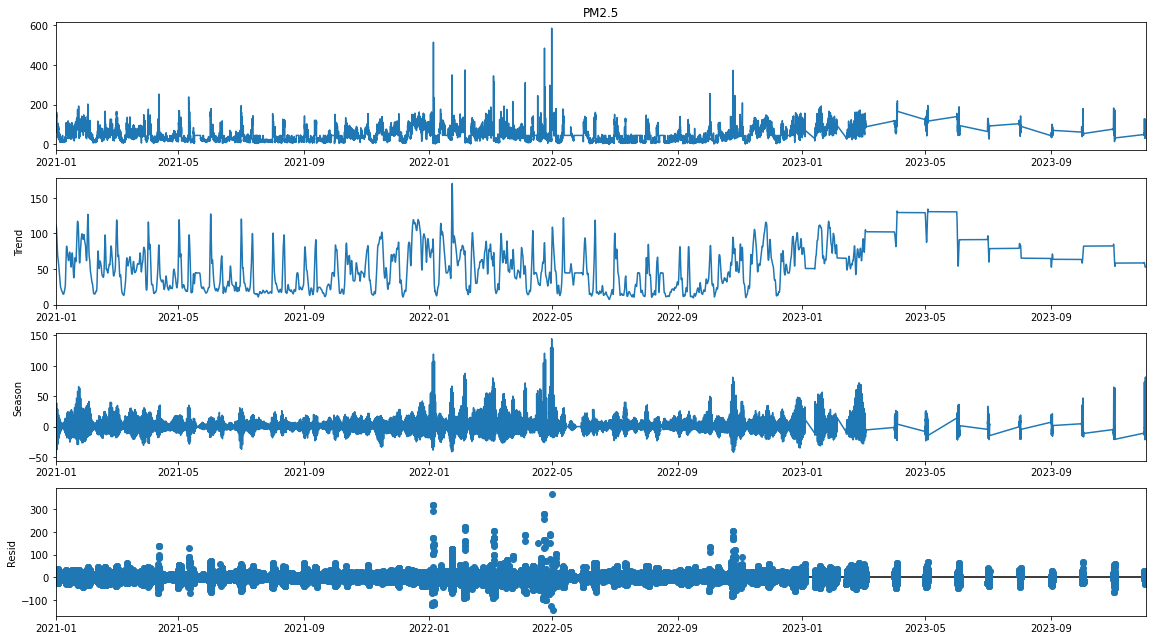

In [9]:
stl = STL(df['PM2.5'], period=96)
res = stl.fit()
fig = res.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

- Auto-correlation and partial auto-correlation plots

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## plot the acf_plot

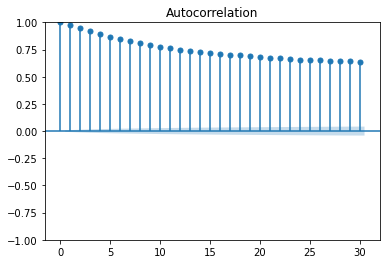

In [11]:
acf_plot = plot_acf(df['PM2.5'], lags=30)

Based on the above ACF plot, it decreases slowly towards zero, which suggests a non-stationary time series. 

- Differencing

In [12]:
df['PM2.5_Diff'] = df['PM2.5'] - df['PM2.5'].shift(1)

In [13]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date,PM2.5_Diff
From Date,,,,,,,,,,,
2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01,NaN
2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01,-4.18
2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01,0.00
2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01,0.00
2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01,1.40


<AxesSubplot:xlabel='From Date'>

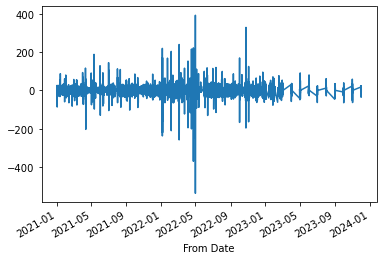

In [14]:
df['PM2.5_Diff'].plot()

/Users/yutong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


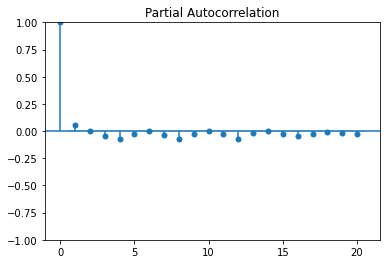

In [15]:
# plot the pacf plot for PM2.5_Diff 
pacf_plot = plot_pacf(df['PM2.5_Diff'].dropna(), lags=20)

Here, we have differencing factor of 1 as PACF immediatly cuts off to zero.

## ARIMA model

- We will build ARIMA model of order  (1,1,1) as we have differencing factor of 1

In [16]:
from statsmodels.tsa.arima.model import ARIMA

pm25_train = df['PM2.5'][:60000]
pm25_test = df['PM2.5'][60000:]

In [17]:
arima = ARIMA(pm25_train.astype(np.float64), order=(1,1,1))
arima_model = arima.fit()
arima_model.summary()

/Users/yutong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Users/yutong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/Users/yutong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                60000
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -210336.944
Date:                Sun, 24 Sep 2023   AIC                         420679.888
Time:                        23:49:53   BIC                         420706.894
Sample:                    01-01-2021   HQIC                        420688.276
                         - 09-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0035      0.163     -0.021      0.983      -0.323       0.316
ma.L1          0.0250      0.163      0.153      0.878      -0.295       0.345
sigma2        64.9443      0.026   2486.574      0.000      64.893      64.995
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1382074401.62
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                            -4.92
Prob(H) (two-sided):                  0.00   Kurtosis:                       746.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# predict and calculate RMSE
predictions = arima_model.forecast(steps=20)

In [19]:
predictions

2022-09-18 00:00:00    3.999945
2022-09-18 00:15:00    3.999945
2022-09-18 00:30:00    3.999945
2022-09-18 00:45:00    3.999945
2022-09-18 01:00:00    3.999945
2022-09-18 01:15:00    3.999945
2022-09-18 01:30:00    3.999945
2022-09-18 01:45:00    3.999945
2022-09-18 02:00:00    3.999945
2022-09-18 02:15:00    3.999945
2022-09-18 02:30:00    3.999945
2022-09-18 02:45:00    3.999945
2022-09-18 03:00:00    3.999945
2022-09-18 03:15:00    3.999945
2022-09-18 03:30:00    3.999945
2022-09-18 03:45:00    3.999945
2022-09-18 04:00:00    3.999945
2022-09-18 04:15:00    3.999945
2022-09-18 04:30:00    3.999945
2022-09-18 04:45:00    3.999945
Freq: 15T, Name: predicted_mean, dtype: float64

## Regression based model

In [20]:
df['pm2.5_autoreg'] = df['PM2.5'].shift(1)

In [21]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date,PM2.5_Diff,pm2.5_autoreg
From Date,,,,,,,,,,,,
2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01,NaN,NaN
2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01,-4.18,79.18
2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01,0.00,75.00
2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01,0.00,75.00
2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01,1.40,75.00


In [22]:
# modeling using regression method and autoregression
model_df = df[['PM2.5','pm2.5_autoreg']].dropna()

In [23]:
# split the data without shuffling
ts_train = model_df[:60000]
ts_test = model_df[60000:]

In [24]:
# split the train and test dataset
X_train = ts_train['pm2.5_autoreg']
y_train = ts_train['PM2.5']

X_test = ts_test['pm2.5_autoreg']
y_test = ts_test['PM2.5']

In [25]:
# import linear model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [26]:
# predictions
preds = lr_model.predict(np.array(X_test).reshape(-1,1))

In [27]:
# measure the performance
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# calculate MAPE
mape = mean_absolute_percentage_error(y_test, preds)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
# calculate R-squared
r2 = r2_score(y_test, preds)

In [28]:
print("MAPE: ", mape)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MAPE:  0.05785420091711441
RMSE:  7.570823755669825
R-squared:  0.9532548390719141


In [29]:
predss = pd.Series(preds, index=y_test.index)

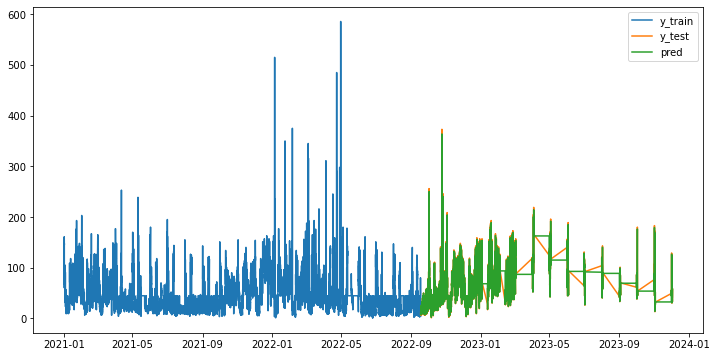

In [30]:
# plot the graph
plt.figure(figsize=(12,6))
plt.plot(y_train, label = "y_train")
plt.plot(y_test, label = "y_test")
plt.plot(predss, label = "pred")
plt.legend()